In [1]:
import os, sys, tarfile
import numpy as np
import matplotlib.pyplot as plt
TR=0.8
from matplotlib import patches, ticker
import time
import pandas as pd
import glob
import nibabel as nib

/home/acamassa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
labels=pd.read_csv('/cnl/abcd/data/labels/baseline_depr_sex_age_hand.csv',header=None, index_col=0)
labels.drop(columns=[1,2,3], inplace=True)
labels.rename(columns={4: 'depression'}, inplace=True)
labels=labels[1:]


In [3]:
control=labels[labels['depression']=='0']
control

,depression
0,
NDARINV08FUB58A,0
NDARINV04GAB2AA,0
NDARINV09AEBLZH,0
NDARINV0GZM9UZJ,0
NDARINV0N10CEEL,0
...,...
NDARINVXN6HMGK8,0
NDARINVXRP6TZGT,0
NDARINVXFVACT0F,0


### Resting state

In [4]:
import sklearn; sklearn.set_config(print_changed_only=False)
from nilearn import maskers

path='/snl/abcd/raw-data/fmri/baseline/rest/'
baseline=[]

for i in range(10):
    sub='sub-'+control.index.values[i]
    print(sub)
    for filename in glob.iglob(path + '**/sub-*.nii', recursive=True):
        if filename.find(sub)>0:

            img = nib.load(filename)
            masker = maskers.NiftiMasker(standardize='zscore', mask_strategy='epi', reports=True)
            masker.fit(img)
            fmri_masked = masker.transform(img) # masked image as np array
            ts=pd.DataFrame(fmri_masked)
            os.chdir('/cnl/abcd/data/imaging/fmri/rsfmri/interim/voxelwise/')
            
            if os.path.exists(sub):
                os.chdir(sub)
            else:
                # If the directory does not exist, create it and then change the current directory to it
                os.makedirs(sub)
                os.chdir(sub)
            ts.to_csv('ts_voxelwise_masked_'+sub+filename.split('/')[-1].split('_')[-2]+'.csv')



sub-NDARINV08FUB58A
sub-NDARINV04GAB2AA
sub-NDARINV0BAVEL0T
sub-NDARINV09AEBLZH
sub-NDARINV0GZM9UZJ
sub-NDARINV0N10CEEL
sub-NDARINV0UEA3Z9E
sub-NDARINV0WC5U4JA
sub-NDARINV10J5M8LB
sub-NDARINV14AFR5D4


KeyboardInterrupt: 

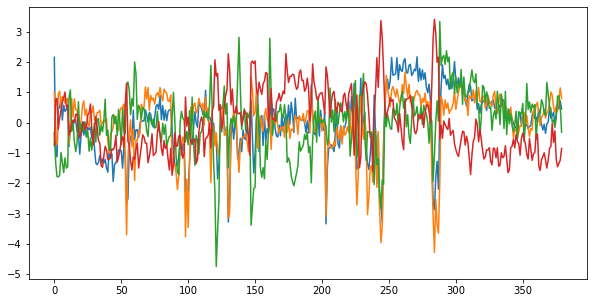

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(ts[0])
plt.plot(ts[10])
plt.plot(ts[100])
plt.plot(ts[1000])
plt.show()

### Task Enback

In [4]:
import sklearn; sklearn.set_config(print_changed_only=False)
from nilearn import maskers

path='/snl/abcd/raw-data/fmri/baseline/nback/'
baseline=[]

for i in range(10):
    # sub='sub-NDARINVZU3J1NFC'
    sub='sub-'+control.index.values[i]
    print(sub)
    for filename in glob.iglob(path + '**/sub-*.nii', recursive=True):
        if filename.find(sub)>0:
            print(filename)
            print('loading')
            img = nib.load(filename)
            masker = maskers.NiftiMasker(standardize='zscore_sample', mask_strategy='epi', reports=True)
            masker.fit(img)
            fmri_masked = masker.transform(img) # masked image as np array
            ts=pd.DataFrame(fmri_masked)
            print('masked')
            os.chdir('/cnl/abcd/data/imaging/fmri/nback/interim/voxelwise/')
            
            if os.path.exists(sub):
                os.chdir(sub)
            else:
                # If the directory does not exist, create it and then change the current directory to it
                os.makedirs(sub)
                os.chdir(sub)
            print('saving')
            ts.to_csv('ts_voxelwise_masked_'+sub+filename.split('/')[-1].split('_')[-2]+'.csv')



sub-NDARINVZU3J1NFC
filename
loading
masked
saving
filename
loading
masked
saving
sub-NDARINVZU3J1NFC
filename
loading
masked
saving


KeyboardInterrupt: 